In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
# 
# import sys
import os
# sys.path.append(os.path.abspath(".."))

from ModelComponents.spectroArchitectures import CNN_spectro
from ModelComponents.dataset_spectro import FolderAudioDataset
from ModelComponents.training import train
from ModelComponents.utils import plot_training_curves

In [7]:
datasets_path = "../examples"
preprocessed_path = os.path.join(datasets_path,"preprocessed/")
checkpoint_path = '../models/MLPv0.pth'
training_plot_save_path = '../results/MLPPerformance.png'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_CNN = CNN_spectro().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_CNN.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

num_epochs = 10
batch_size = 4
noise_prob_train = 0.7
noise_prob_test = 0

In [8]:
data_train = FolderAudioDataset(os.path.join(preprocessed_path,"train"), os.path.join(datasets_path,"bruits"), noise_prob=noise_prob_train)
train_loader = DataLoader(data_train, batch_size=batch_size, shuffle=True)


data_test = FolderAudioDataset(os.path.join(preprocessed_path,"test"), os.path.join(datasets_path,"bruits"), noise_prob=noise_prob_test)
test_loader = DataLoader(data_test, batch_size=batch_size, shuffle=True)

In [9]:
train_loss_list, train_acc_list, test_loss_list, test_acc_list = train(model_CNN, train_loader, test_loader, criterion, optimizer, checkpoint_path, device, num_epochs, scheduler)

Epoch [1/10]
Train Loss: 5.8749, Train Acc: 5.56%
Test Loss: 1.7726, Test Acc: 22.22%

Best model saved with accuracy: 22.22%
Epoch [2/10]
Train Loss: 1.8706, Train Acc: 5.56%
Test Loss: 1.7116, Test Acc: 33.33%

Best model saved with accuracy: 33.33%
Epoch [3/10]
Train Loss: 1.6653, Train Acc: 38.89%
Test Loss: 2.4734, Test Acc: 11.11%

Epoch [4/10]
Train Loss: 1.7221, Train Acc: 27.78%
Test Loss: 2.0629, Test Acc: 38.89%

Best model saved with accuracy: 38.89%
Epoch [5/10]
Train Loss: 1.4409, Train Acc: 50.00%
Test Loss: 2.6140, Test Acc: 16.67%

Epoch [6/10]
Train Loss: 1.0030, Train Acc: 61.11%
Test Loss: 2.6044, Test Acc: 16.67%

Epoch [7/10]
Train Loss: 1.0423, Train Acc: 66.67%
Test Loss: 2.5955, Test Acc: 16.67%
Epoch [8/10]
Train Loss: 0.9064, Train Acc: 66.67%
Test Loss: 2.8404, Test Acc: 16.67%

Epoch [9/10]
Train Loss: 0.8774, Train Acc: 66.67%
Test Loss: 3.6354, Test Acc: 16.67%

Epoch [10/10]
Train Loss: 0.8038, Train Acc: 66.67%
Test Loss: 3.4015, Test Acc: 16.67%


Plot saved to ../results/MLPPerformance.png


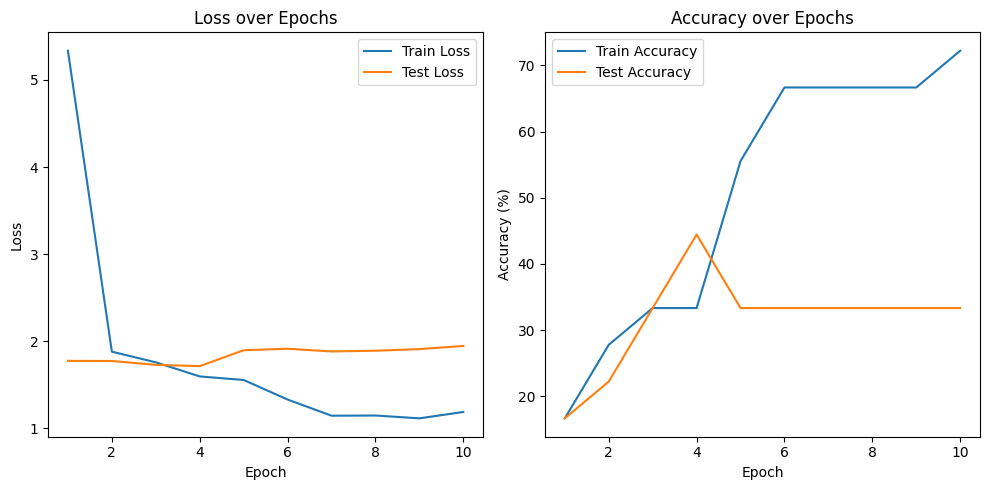

In [5]:
plot_training_curves(train_loss_list, test_loss_list, train_acc_list, test_acc_list, num_epochs, training_plot_save_path)